In [9]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [10]:
def random_batch():
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)
    
    for i in random_index:
        random_inputs.append(np.eye(voc_size)[skip_grams[i][0]]) # target
        random_labels.append(skip_grams[i][1]) # context word
    
    return random_inputs, random_labels

In [15]:
# Model
class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()
        
        #W and WT is not Transposed each other 
        
        self.W = nn.Linear(voc_size, embedding_size, bias=False) # voc_size > embedding_size Weight
        self.WT = nn.Linear(embedding_size, voc_size, bias=False) # embedding_size > voc_size Weight
        
    def forward(self, X):
        # X : [batch_size, voc_size]
        hidden_layer = self.W(X) # hidden_layer : [batch_size, embedding_size]
        output_layer = self.WT(hidden_layer) # output_layer : [batch_size, voc_size]
        return output_layer        

Epoch: 1000 cost :  2.798709
Epoch: 2000 cost :  2.350678
Epoch: 3000 cost :  3.043154
Epoch: 4000 cost :  2.838667
Epoch: 5000 cost :  1.809826
Epoch: 6000 cost :  1.580710
Epoch: 7000 cost :  0.653119
Epoch: 8000 cost :  0.763272
Epoch: 9000 cost :  3.216637
Epoch: 10000 cost :  0.697354


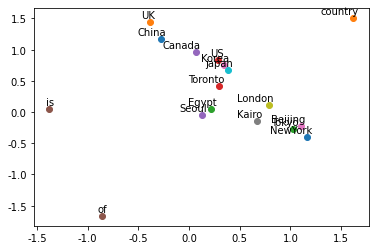

In [26]:
if __name__ == '__main__':
    batch_size = 1 # mini-batch size
    embedding_size = 2 # embedding size
    
    sentences = ["Seoul is country of Korea", "Tokyo is country of japan", "Beijing is country of China",
                 "NewYork is country of US", "London is country of UK", "Toronto is country of Canada", 
                 "Kairo is country of Egypt"]
    
    word_sequence = " ".join(sentences).split() # split by space
    word_list = " ".join(sentences).split() # all words (with overlap)
    word_list = list(set(word_list)) # Vocab
    word_dict = {w:i for i, w in enumerate(word_list)} # word dict
    voc_size = len(word_list)
    
    # Make skip gram of one size window 
    skip_grams = []
    for i in range(1, len(word_sequence) - 1):  # window size = 1 
        target = word_dict[word_sequence[i]]
        context = [word_dict[word_sequence[i-1]], word_dict[word_sequence[i+1]]]
        
        for w in context:
            skip_grams.append([target, w])
            
    model = Word2Vec()
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr = 0.001)
    
    # Training
    for epoch in range(10000):
        input_batch, target_batch = random_batch()
        input_batch = torch.Tensor(input_batch)
        target_batch = torch.LongTensor(target_batch)
        
        optimizer.zero_grad()
        output = model(input_batch)
        
        #output : [batch_size, voc_size], target_batch : [batch_size](LongTensor, not one-hot)
        loss = criterion(output, target_batch)
        if (epoch + 1) % 1000 == 0:
            print('Epoch:', '%04d' % (epoch + 1), 'cost : ', '{:.6f}'.format(loss))
        
        loss.backward()
        optimizer.step()
        
    for i, label in enumerate(word_list):
        W, WT = model.parameters()
        x, y = W[0][i].item(), W[1][i].item()
        plt.scatter(x,y)
        plt.annotate(label, xy=(x,y), xytext=(5,2), textcoords='offset points', ha='right', va='bottom')
    plt.show()